In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("../data/train.csv")
df.head()

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
0,Manhattan,NaN,2.0,82.5,15.0,254.0,3
1,Manhattan,Private room,2.0,53.7,1.0,0.0,1
2,Brooklyn,Private room,2.0,47.8,70.0,90.0,1
3,Manhattan,Entire home/apt,2.0,58.8,1.0,NaN,1
4,Bronx,Private room,2.0,32.2,0.0,89.0,1


In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (41348, 7)


In [6]:
print("Data types:")
print(df.dtypes)

Data types:
neighbourhood_group        str
room_type                  str
minimum_nights         float64
amenity_score          float64
number_of_reviews      float64
availability_365       float64
price_class              int64
dtype: object


In [7]:
print("Basic info:")
df.info()

Basic info:
<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB


In [8]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percent
})
    
missing_df

,Missing Values,Percentage
neighbourhood_group,839,2.029119
room_type,611,1.477701
minimum_nights,1322,3.197253
amenity_score,916,2.215343
number_of_reviews,1123,2.715972
availability_365,595,1.439006
price_class,0,0.000000


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

C:\Users\HP\AppData\Local\Temp\ipykernel_20860\2707260187.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns


In [11]:
df.isnull().sum()

neighbourhood_group    0
room_type              0
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
price_class            0
dtype: int64

In [12]:
df["price_class"].value_counts()

price_class
1.0    23287
2.0     9844
0.0     5567
3.0     2650
Name: count, dtype: int64

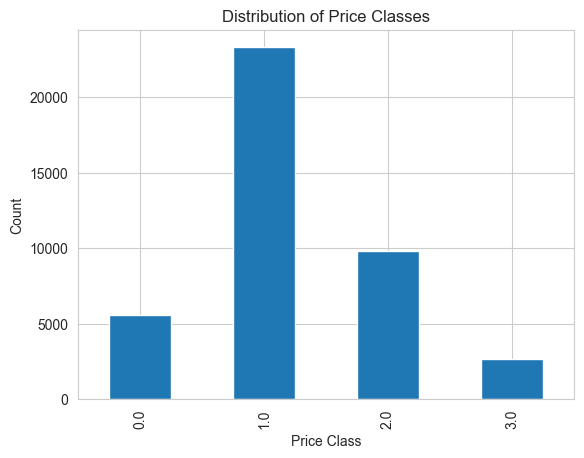

In [13]:
plt.figure()
df["price_class"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Price Classes")
plt.xlabel("Price Class")
plt.ylabel("Count")
plt.show()

In [14]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols

C:\Users\HP\AppData\Local\Temp\ipykernel_20860\1619192003.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns


Index(['neighbourhood_group', 'room_type'], dtype='str')

In [16]:
print(df["neighbourhood_group"].unique())
print(df["room_type"].unique())


<StringArray>
['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']
Length: 5, dtype: str
<StringArray>
['Entire home/apt', 'Private room', 'Shared room']
Length: 3, dtype: str


In [17]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)

In [18]:
df_encoded.head()

,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2.0,82.5,15.0,254.0,3.0,False,False,True,False,False,True,False,False
1,2.0,53.7,1.0,0.0,1.0,False,False,True,False,False,False,True,False
2,2.0,47.8,70.0,90.0,1.0,False,True,False,False,False,False,True,False
3,2.0,58.8,1.0,44.0,1.0,False,False,True,False,False,True,False,False
4,2.0,32.2,0.0,89.0,1.0,True,False,False,False,False,False,True,False


In [19]:
df_encoded.shape

(41348, 13)

In [20]:
num_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['minimum_nights', 'amenity_score', 'number_of_reviews',
       'availability_365', 'price_class'],
      dtype='str')

In [21]:
X = df_encoded.drop(columns=["price_class"])
y = df_encoded["price_class"]

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_scaled = X.copy()

X_scaled[num_cols.drop("price_class", errors="ignore")] = scaler.fit_transform(
    X[num_cols.drop("price_class", errors="ignore")]
)

In [24]:
X_scaled.describe()

,minimum_nights,amenity_score,number_of_reviews,availability_365
count,4.134800e+04,4.134800e+04,4.134800e+04,4.134800e+04
mean,-2.861211e-17,-9.279604e-17,-3.436890e-17,-5.636500e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-3.025178e-01,-2.181308e+00,-5.257853e-01,-8.495871e-01
25%,-3.025178e-01,-7.729808e-01,-5.030650e-01,-8.495871e-01
50%,-1.995311e-01,-2.984115e-02,-4.121839e-01,-5.126163e-01
75%,-9.654441e-02,7.184953e-01,-3.218907e-03,8.352671e-01
max,5.113933e+01,2.443827e+00,1.326542e+01,1.945739e+00


In [25]:
df_plot = X_scaled.copy()
df_plot["price_class"] = y

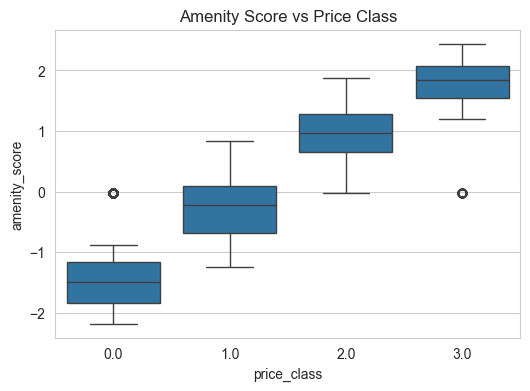

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="price_class", y="amenity_score", data=df_plot)
plt.title("Amenity Score vs Price Class")
plt.show()

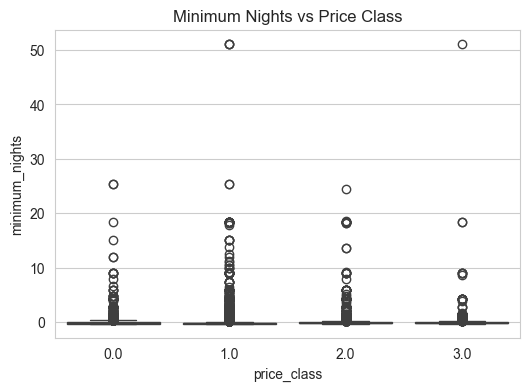

In [40]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="price_class", y="minimum_nights", data=df_plot)
plt.title("Minimum Nights vs Price Class")
plt.show()

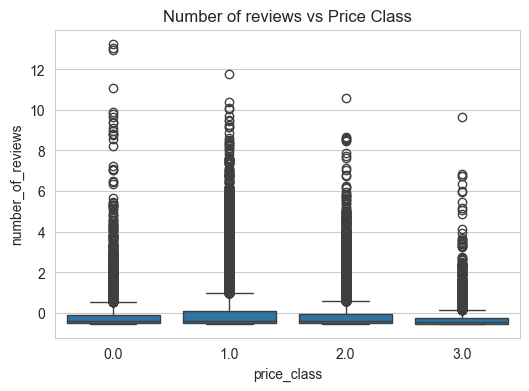

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="price_class", y="number_of_reviews", data=df_plot)
plt.title("Number of reviews vs Price Class")
plt.show()

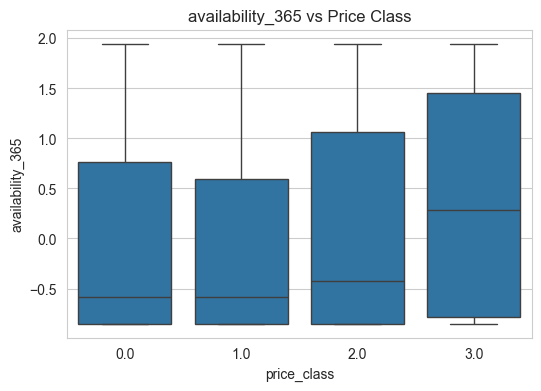

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="price_class", y="availability_365", data=df_plot)
plt.title("availability_365 vs Price Class")
plt.show()

In [32]:
df_plot["neighbourhood_group"] = df["neighbourhood_group"]
df_plot["room_type"] = df["room_type"]

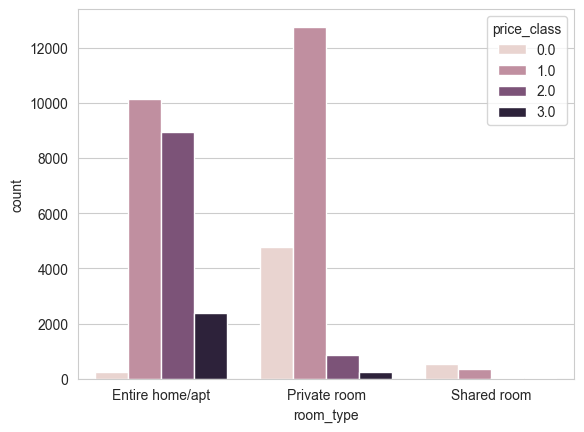

In [33]:
sns.countplot(x="room_type", hue="price_class", data=df)
plt.show()


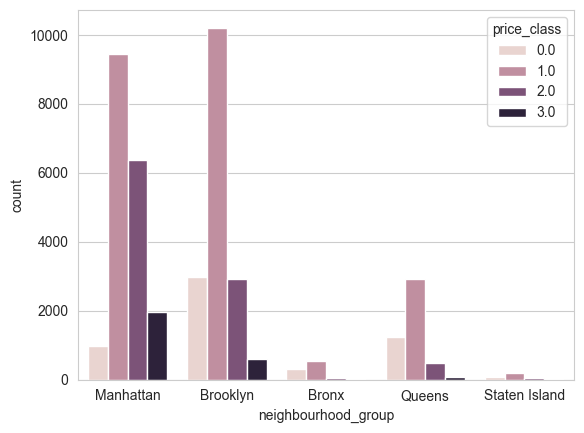

In [34]:
sns.countplot(x="neighbourhood_group", hue="price_class", data=df)
plt.show()

In [37]:
num_features = [
    "minimum_nights",
    "number_of_reviews",
    "availability_365",
    "amenity_score"
]

corr_matrix = df[num_features].corr()
corr_matrix

,minimum_nights,number_of_reviews,availability_365,amenity_score
minimum_nights,1.000000,-0.081572,0.134664,0.023137
number_of_reviews,-0.081572,1.000000,0.170843,-0.030034
availability_365,0.134664,0.170843,1.000000,0.079270
amenity_score,0.023137,-0.030034,0.079270,1.000000


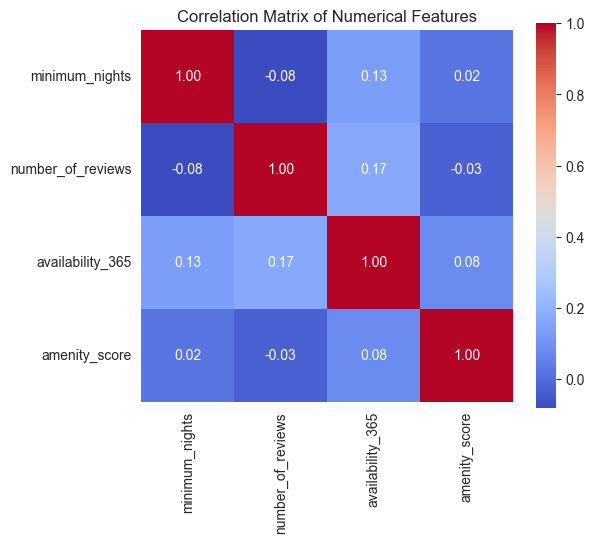

In [38]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()